In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,8,14,4,1,0
1,1,6,9,4,1,0
2,2,4,11,3,1,0
3,3,3,10,5,1,0
4,4,7,15,4,1,0


In [5]:
x = data.iloc[:,:].values
x[:5]

array([[ 0,  8, 14,  4,  1,  0],
       [ 1,  6,  9,  4,  1,  0],
       [ 2,  4, 11,  3,  1,  0],
       [ 3,  3, 10,  5,  1,  0],
       [ 4,  7, 15,  4,  1,  0]], dtype=int64)

In [8]:
import random

class kmeans():

    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def fit(self, x):
        random_index = random.sample(range(0, x.shape[0]), self.n_clusters)
        self.centroids = x[random_index]
        for i in range(self.max_iter):
            cluster_group = self.assign_cluster(x)
            old_centroids = self.centroids
            self.centroids = self.move_centroid(x, cluster_group)
            if (old_centroids == self.centroids).all():
                break
        return cluster_group
    
    def assign_cluster(self, x):
        cluster_group = []
        distances = []
        for row in x:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot((row-centroid), (row-centroid))))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)
    
    def move_centroid(self, x, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(x[type == cluster_group].mean(axis=0))
        return np.array(new_centroids)

In [9]:
km = kmeans(n_clusters=3,max_iter=1000)
y_means = km.fit(x)

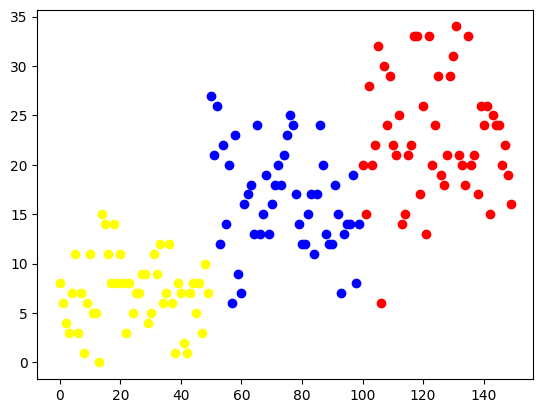

In [10]:
plt.scatter(x[y_means == 0,0], x[y_means == 0, 1], color='red')
plt.scatter(x[y_means == 1,0], x[y_means == 1, 1], color='blue')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], color='yellow')
plt.show()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

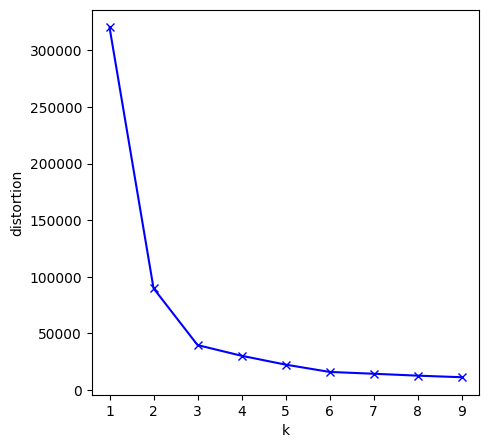

In [17]:
distortion = []
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(data)
    distortion.append(model.inertia_)
plt.figure(figsize=(5, 5))
plt.plot(range(1, 10), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.show()